## SAGA Paper 4, FIGURE 1: Images

In [1]:
import numpy as np
from myplotstyle import plt
from astropy.io import ascii

%matplotlib inline

from matplotlib import cm
from matplotlib.patches import Circle, Ellipse

import matplotlib.backends.backend_pdf
from pylab import imread,subplot,imshow,show

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H


In [2]:
saga = SAGA.QuickStart()

complete_hosts         = saga.host_catalog.load(include_stats='True',query='paper3')

SAGA `shared_dir` set to /Users/mg37/DropBox/SAGA/
SAGA `local_dir`  set to /Users/mg37/Projects/SAGA/


In [3]:
imdir = 'data/'

In [4]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

sats = C.is_sat.filter(base)

In [5]:
# DECIDE ON FIVE OBJIDs TO PLOT
objids = [902936860000002221,902837640000001720, 900335040000004860,902936850000003339, 902686990000002460]

In [6]:
# IMAGES ARE 0.75 arcmin on a side
# 180x180 pixels

arcs_per_pixel = 0.75*60/180.


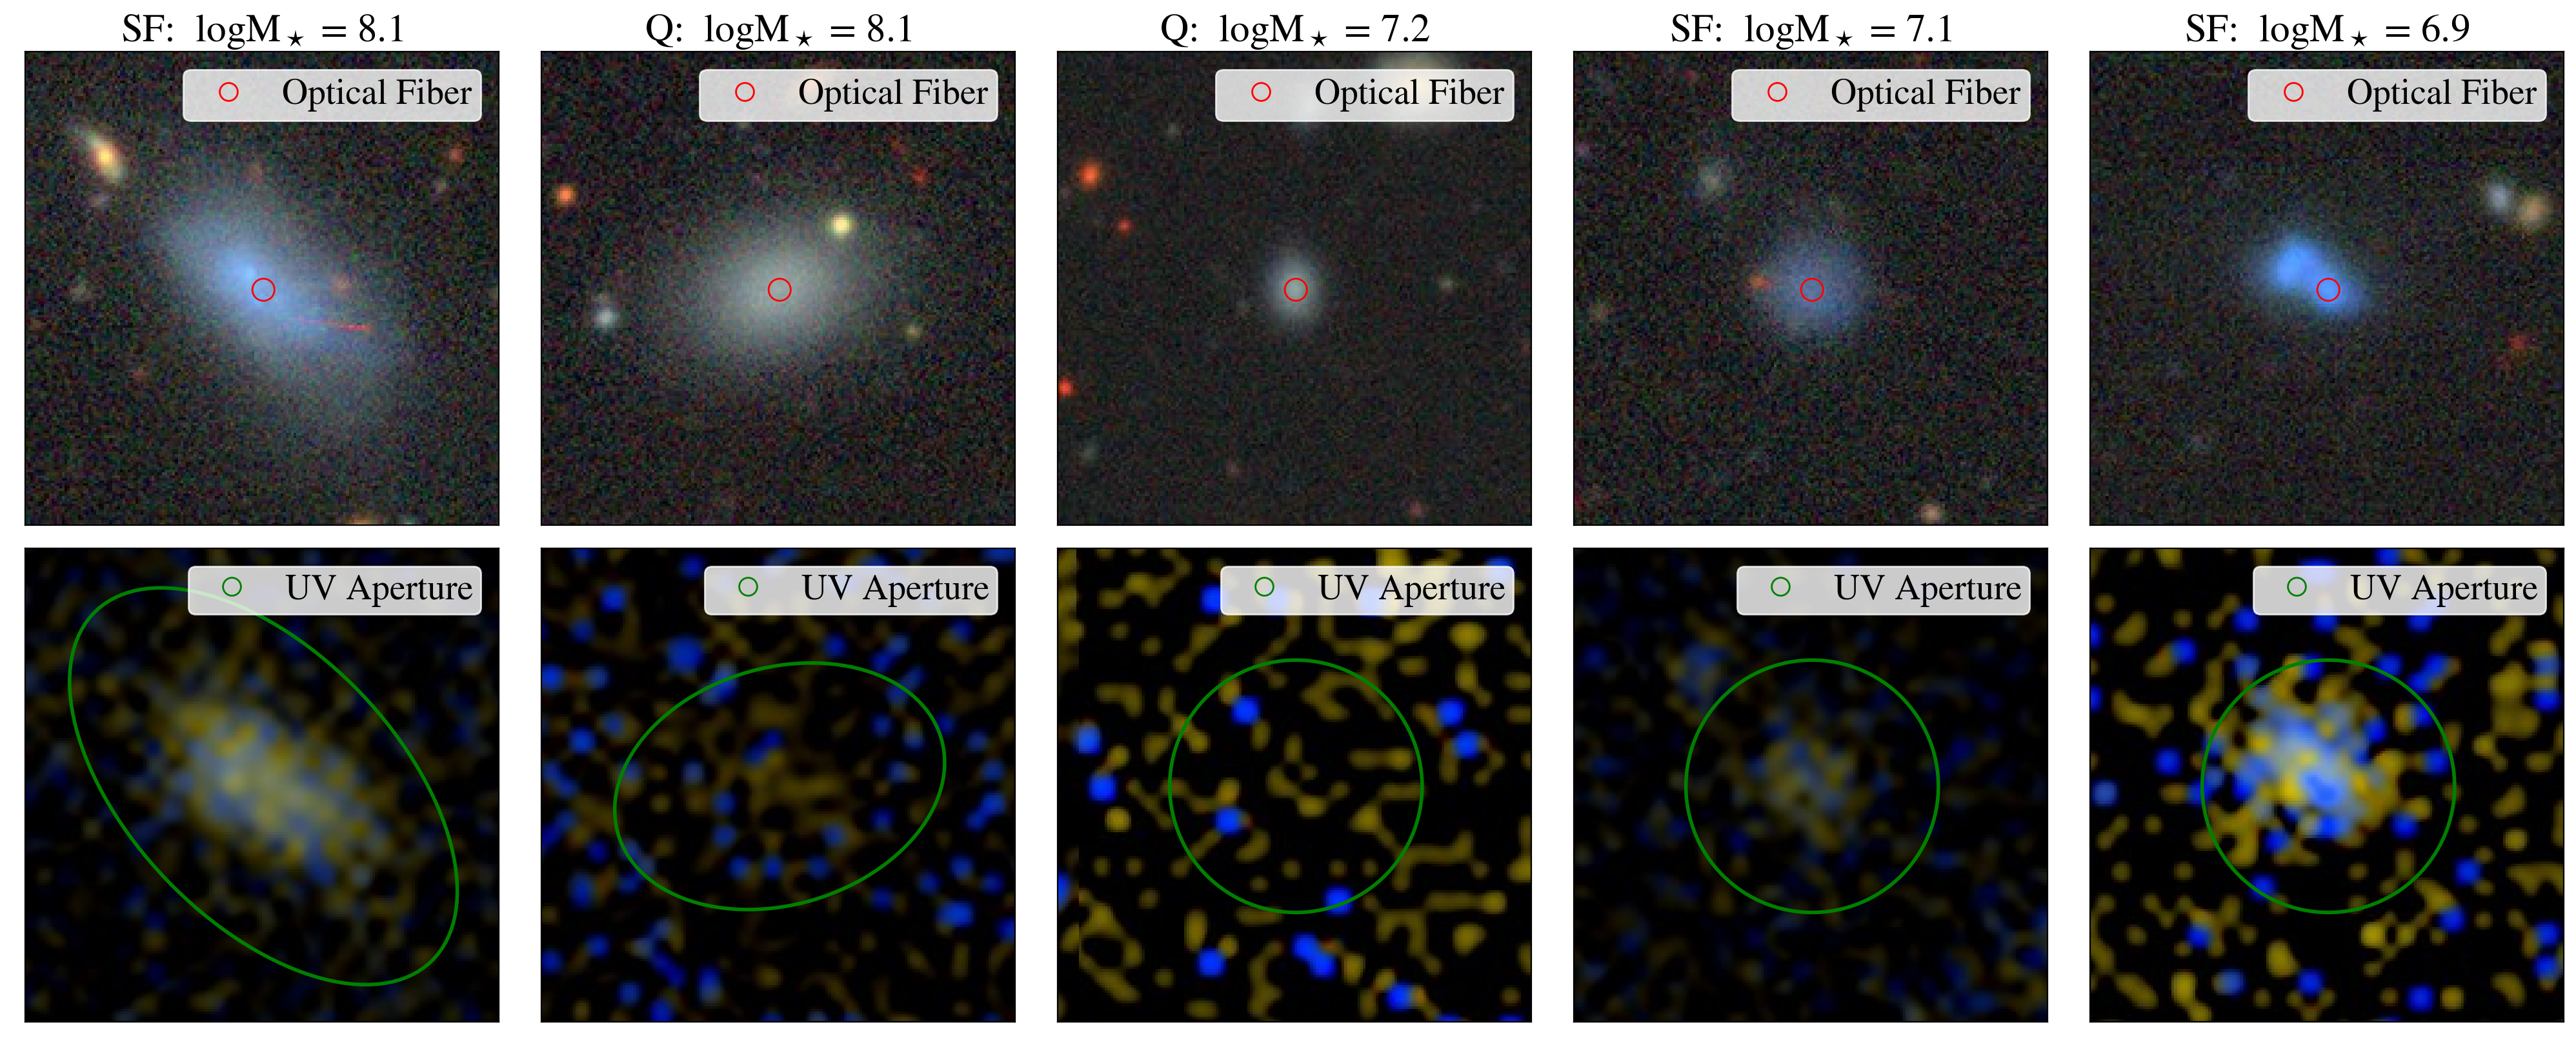

In [7]:
pdf = matplotlib.backends.backend_pdf.PdfPages('figure_images.pdf')

plt.rcParams.update({'font.size': 12})
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2, 5,figsize=(20,8))


##################
ax_opt = [ax1,ax2,ax3,ax4,ax5]
ax_uv  = [ax6,ax7,ax8,ax9,ax10]

for obj, axo,axu in zip(objids,ax_opt,ax_uv):
    
    file1 = imdir + str(obj)+'.jpg'
    file2 = imdir + str(obj)+'_UV.jpg'

    im1 = imread(file1)
    im2 = imread(file2)
    axo.imshow(im1)
    axu.imshow(im2)
    
    axo.axes.get_xaxis().set_visible(False)
    axo.axes.get_yaxis().set_visible(False)
    axu.axes.get_xaxis().set_visible(False)
    axu.axes.get_yaxis().set_visible(False)

    mbase = np.in1d(sats['OBJID'],obj)

    # EFFECTIVE RADIUS
    reff     = sats['radius'][mbase][0]
    ba       = sats['ba'][mbase][0]
    phi      = sats['phi'][mbase][0]
    telname  = sats['TELNAME'][mbase][0]

    reff_pix = reff/arcs_per_pixel
    
    # TELESCOPE FIBER SIZE (AAT =2.1 diameter fiber, )
    if telname == 'AAT':
        rfiber = 1.05/arcs_per_pixel
    if telname == 'MMT':
        rfiber = 1.5/(2.*arcs_per_pixel)
     

    if reff < 5.5:
        reff=6
        ba=1
    
    reff_pix = reff/arcs_per_pixel
    
    aat_fiber = Circle((180/2.,180/2.),rfiber,edgecolor = 'r',facecolor='None',label='Optical Fiber')
    axo.add_patch(aat_fiber)
    
    aat_uv = Ellipse((180/2.,180/2.),2*2*reff_pix,2*2*reff_pix/ba,angle = 180.-phi,edgecolor = 'g',\
                     facecolor='None',lw=2,label='UV Aperture')
    axu.add_patch(aat_uv)
    
    
    str_q = 'Q: '
    str_c = 'r'
    if (sats['quenched'][mbase][0] == 0):
        str_q = 'SF: '
        str_c = 'b'

    
    l1 = matplotlib.lines.Line2D([], [], color='r', marker='o', ls='', label='Optical Fiber',\
                                 ms=10,fillstyle='none')
    l2 = matplotlib.lines.Line2D([], [], color='g', marker='o', ls='', label='UV Aperture',\
                                 ms=10,fillstyle='none')

    legend1 = axo.legend(fontsize=20,loc='upper right',handles=[l1],frameon = 1,borderpad=0.25)
    legend2 = axu.legend(fontsize=20,loc='upper right',handles=[l2],frameon = 1,borderpad=0.21)

    
    frame1 = legend1.get_frame()
    frame1.set_color('white')

    frame2 = legend2.get_frame()
    frame2.set_color('white')

    sm = sats['log_sm'][mbase][0]
    str_logsm = r'logM$_\star$ = {:0.1f}'.format(sm)

    axo.set_title(str_q+' '+str_logsm,fontsize=22)

pdf.savefig()
pdf.close()